# Packages

In [31]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats

In [32]:
def get_r2(x,y):
    polyfit = np.polyfit(x,y,1)
    y_predicted = np.polyval(polyfit,x)
    residuals = y-y_predicted
    return 1-np.sum(residuals**2)/np.sum((y-np.mean(y))**2)

def get_percentiles(x):
    y_percentiles = np.arange(101)
    x_percentiles = [np.percentile(x,y_percentiles[i]) for i in range(len(y_percentiles))]
    return x_percentiles,y_percentiles

def get_realpdf(x,y,nbins):
    polyfit = np.polyfit(x,y,1)
    y_predicted = np.polyval(polyfit,x)
    residuals = y-y_predicted    
    bins    = np.linspace(-np.max(np.abs(residuals)),np.max(np.abs(residuals)),nbins)
    binmids = bins[1:] - np.diff(bins)/2
    bindensity,_ = np.histogram(residuals,bins=bins,density=True)
    return bindensity,binmids,bins

def get_normalpdf(x,y,binmids):
    polyfit = np.polyfit(x,y,1)
    y_predicted = np.polyval(polyfit,x)
    residuals = y-y_predicted
    mean = np.mean(residuals)
    std = np.std(residuals)
    return stats.norm.pdf(binmids,mean,std)

def get_powerlaw_constants(x,y):
    polyfit = np.polyfit(np.log10(x),np.log10(y),1)
    l,n = 10**polyfit[1],polyfit[0]
    return l,n

# Read data

In [1146]:
data_justtemp = pd.read_csv('Just Temp data.csv')
Et = data_justtemp['ET']
At = data_justtemp['Air Temperature']

In [1147]:
data_tempet = pd.read_csv('Temp.ET.csv')
et = data_tempet['ET']
t = data_tempet['Temp']

In [1189]:
data = pd.read_csv('Variables.csv')
H   = data['Hours']
h   = data['Temp']
v  = data['ET']
CO2  = data['CO2']
CH4  = data['CH4']

In [1190]:
data_raw = pd.read_csv('raw data.csv')
d   = data_raw['DOY']
at   = data_raw['air_temperature']
ev  = data_raw['ET']
co  = data_raw['co2_flux']

# Analysis

In [1191]:
h_percentiles,y_percentiles = get_percentiles(h)

In [1192]:
get_r2(h,v**(1/3))

0.7535341102854709

In [1193]:
stats.linregress(h,v**(1/3))

LinregressResult(slope=0.04324576951409959, intercept=-12.54919769353421, rvalue=0.8680634252665363, pvalue=1.3713354947141718e-15, stderr=0.003646629715074727, intercept_stderr=1.0947250009748832)

In [1194]:
l_fit,n_fit = get_powerlaw_constants(h,v)

In [1196]:
nbins = 20

vthird_residuals_realpdf,vthird_residuals_binmids,vthird_residuals_bins = get_realpdf(h,v**(1/3),nbins)
vthird_residuals_normalpdf = get_normalpdf(h,v**(1/3),vthird_residuals_binmids)

In [1197]:
nbins = 20

#log10v_residuals_realpdf,log10v_residuals_binmids,log10v_residuals_bins = get_realpdf(np.log10(h),np.log10(v),nbins)
#log10v_residuals_normalpdf = get_normalpdf(np.log10(h),np.log10(v),log10v_residuals_binmids)

# Plots

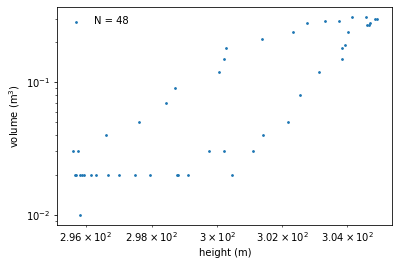

In [1198]:
ss = 3
plt.scatter(h,v,s=ss,label='N = %d'%len(h))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('height (m)')
plt.ylabel('volume (m$^3$)')
plt.legend(frameon=False)

(295.6144091, 304.9236818)

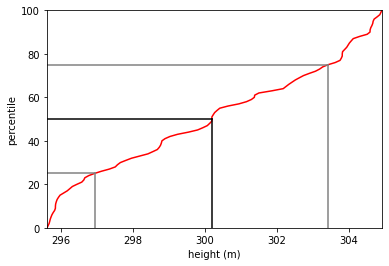

In [1200]:
plt.plot(h_percentiles,y_percentiles,c='r')
plt.plot([h_percentiles[0],h_percentiles[25]],[25,25],c='grey')
plt.plot([h_percentiles[0],h_percentiles[50]],[50,50],c='k')
plt.plot([h_percentiles[0],h_percentiles[75]],[75,75],c='grey')
plt.plot([h_percentiles[25],h_percentiles[25]],[0,25],c='grey')
plt.plot([h_percentiles[50],h_percentiles[50]],[0,50],c='k')
plt.plot([h_percentiles[75],h_percentiles[75]],[0,75],c='grey')
plt.xscale('log')
plt.xlabel('height (m)')
plt.ylabel('percentile')
plt.ylim(0,100)
plt.xlim(np.min(h),np.max(h))

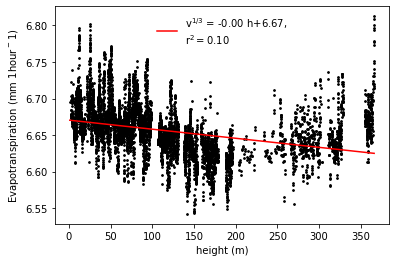

In [1183]:
ss = 3

plt.scatter(h,v**(1/3),c='k',s=ss)

h_vs_vthird_polyfit = np.polyfit(h,v**(1/3),1)
tempx = np.linspace(np.min(h),np.max(h))
plt.plot(tempx,np.polyval(h_vs_vthird_polyfit,tempx),'r',label='v$^{1/3}$ = %.2f h+%.2f,\nr$^2=%.2f$'%(h_vs_vthird_polyfit[0],h_vs_vthird_polyfit[1],get_r2(h,v**(1/3))))

plt.xlabel('height (m)')
plt.ylabel('Evapotranspiration (mm 1hour$^-1$)')
plt.legend(frameon=False)

Text(0, 0.5, 'PDF')

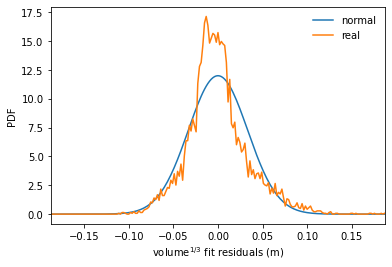

In [1184]:
plt.plot(vthird_residuals_binmids, vthird_residuals_normalpdf,label='normal')
plt.plot(vthird_residuals_binmids,vthird_residuals_realpdf,label='real')
plt.xlim(vthird_residuals_bins[0],vthird_residuals_bins[-1])
plt.legend(frameon=False)
plt.xlabel('volume$^{1/3}$ fit residuals (m)')
plt.ylabel('PDF')

C:\Users\eboni\AppData\Local\Temp\ipykernel_36948\3329889542.py:3: RuntimeWarning: invalid value encountered in log10
  tempx = np.logspace(np.log10(np.min(h)),np.log10(np.max(h)))
C:\Users\eboni\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


LinAlgError: SVD did not converge in Linear Least Squares

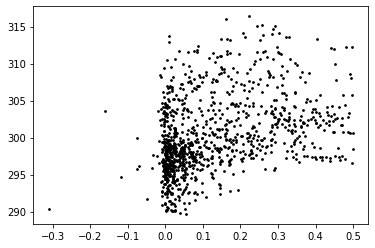

In [1145]:
ss = 3
plt.scatter(h,v,c='k',s=ss)
tempx = np.logspace(np.log10(np.min(h)),np.log10(np.max(h)))
plt.plot(tempx,l_fit*tempx**n_fit,'r',label='v=%.2fh$^{%.2f}$\nr$^2$=%.2f'%(l_fit,n_fit,get_r2(np.log10(h),np.log10(v))))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('height (m)')
plt.ylabel('volume (m$^3$)')
plt.legend(frameon=False)

Text(0, 0.5, 'PDF')

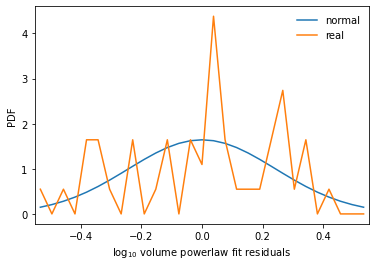

In [1075]:
plt.plot(log10v_residuals_binmids,log10v_residuals_normalpdf,label='normal')
plt.plot(log10v_residuals_binmids,log10v_residuals_realpdf,label='real')
plt.xlim(log10v_residuals_bins[0],log10v_residuals_bins[-1])
plt.legend(frameon=False)
plt.xlabel('$\\log_{10}$ volume powerlaw fit residuals')
plt.ylabel('PDF')